In [5]:
#Import scikit-learn dataset library
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:

#load dataset
iris = datasets.load_iris()

In [3]:
# Keys present along with the iris dataset
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
# Target names
print(iris.target_names)

# feature name
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [20]:
data = pd.DataFrame(iris.data,columns=iris.feature_names)

In [22]:
data["species"] = iris.target

In [23]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [24]:
# Train test split
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [25]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf = RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [26]:
# Predict the Unknown data
y_pred = clf.predict(X_test)

In [27]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy Score:", metrics.accuracy_score(y_test,y_pred))

Accuracy Score: 0.9777777777777777


In [28]:
#Now you can predict which type of flower it is.
clf.predict([[3, 5, 4, 2]])

array([2])

In [31]:
#Finding Important Features in Scikit-learn
feature_imp = pd.Series(clf.feature_importances_, index=iris.feature_names).sort_values(ascending=False)

In [34]:
feature_imp

petal width (cm)     0.462425
petal length (cm)    0.416950
sepal length (cm)    0.098846
sepal width (cm)     0.021780
dtype: float64

No handles with labels found to put in legend.


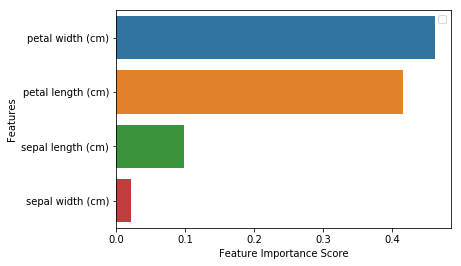

In [35]:
import seaborn as sns

sns.barplot(x=feature_imp,y=feature_imp.index)
# adding labels
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.legend()
plt.show()

In [37]:
#Generating the Model on Selected Features
#Split dataset into features and labels
X = data[['sepal length (cm)','petal length (cm)', 'petal width (cm)']]
y = data['species']

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=5) # 70% training and 30% test

In [38]:
#Create a Gaussian Classifier already and using it now
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [39]:
# prediction on test set
y_pred=clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9523809523809523
